# Apply observables

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import time
import datetime

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [19]:
circ1 = Circuit().h(0).h(1)
circ1.expectation(Observable.X() @ Observable.X(), target=[0,1])
circ1.expectation(Observable.X(), target=[0])
circ1.expectation(Observable.X(), target=[1])
print(circ1)

circ2 = Circuit().h(0).h(1)
circ2.expectation(Observable.Y() @ Observable.Y(), target=[0,1])
circ2.expectation(Observable.Y(), target=[0])
circ2.expectation(Observable.Y(), target=[1])
# print(circ2)

circ3 = Circuit().h(0).h(1)
circ3.expectation(Observable.Z() @ Observable.Z(), target=[0,1])
circ3.expectation(Observable.Z(), target=[0])
circ3.expectation(Observable.Z(), target=[1])
# print(circ3)

circ4 = Circuit().h(0).h(1)
circ4.expectation(Observable.H() @ Observable.H(), target=[0,1])
circ4.expectation(Observable.H(), target=[0])
circ4.expectation(Observable.H(), target=[1])
# print(circ4)

circ5 = Circuit().h(0).h(1)
circ5.expectation(Observable.I() @ Observable.I(), target=[0,1])
circ5.expectation(Observable.I(), target=[0])
circ5.expectation(Observable.I(), target=[1])
# print(circ5)

T  : |0|         Result Types          |
                                        
q0 : -H-Expectation(X@X)-Expectation(X)-
        |                               
q1 : -H-Expectation(X@X)-Expectation(X)-

T  : |0|         Result Types          |


Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(1)]))], 'result_types': [Expectation(observable=TensorProduct(I('qubit_count': 1), I('qubit_count': 1)), target=QubitSet([Qubit(0), Qubit(1)])), Expectation(observable=I('qubit_count': 1), target=QubitSet([Qubit(0)])), Expectation(observable=I('qubit_count': 1), target=QubitSet([Qubit(1)]))])

### Local Simulator

In [20]:
device = LocalSimulator()

result1 = device.run(circ1, shots=1000).result()
print(result1.measurement_counts)
print(result1.values)

result2 = device.run(circ2, shots=1000).result()
print(result2.measurement_counts)
print(result2.values)

result3 = device.run(circ3, shots=1000).result()
print(result3.measurement_counts)
print(result3.values)

result4 = device.run(circ4, shots=1000).result()
print(result4.measurement_counts)
print(result4.values)

result5 = device.run(circ5, shots=1000).result()
print(result5.measurement_counts)
print(result5.values)

Counter({'00': 1000})
[1.0, 1.0, 1.0]
Counter({'11': 253, '00': 253, '01': 251, '10': 243})
[0.012, 0.008, -0.008]
Counter({'11': 259, '01': 255, '10': 249, '00': 237})
[-0.008, -0.016, -0.028]
Counter({'00': 718, '01': 139, '10': 132, '11': 11})
[0.458, 0.714, 0.7]
Counter({'11': 268, '01': 248, '10': 244, '00': 240})
[1.0, 1.0, 1.0]


## Hardware

In [10]:
import boto3
from braket.aws import AwsQuantumJob, AwsSession

region_name = "eu-west-2"
endpoint_url = "https://5sk8cnl96i.execute-api.eu-west-2.amazonaws.com/Prod"

# region_name = "eu-west-2"
# endpoint_url = "https://braket-gamma.eu-west-2.amazonaws.com"

braket_client = boto3.client("braket", region_name=region_name, endpoint_url=endpoint_url)
aws_session = AwsSession(braket_client=braket_client)

In [11]:
# device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
# device = AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy",aws_session=aws_session)

In [12]:
now = datetime.datetime.now().strftime('%y%m%d%H%M%S')
my_bucket = "amazon-braket-hardware-testing" # the name of the bucket
my_prefix = "OQC-obs-" + now # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

In [13]:
result_hw1 = device.run(circ1, s3_folder, shots=1000).result()
print(result_hw1.measurement_counts)
print(result_hw1.values)

Counter({'00': 844, '01': 132, '10': 18, '11': 6})
[0.7, 0.952, 0.724]


In [15]:
result_hw2 = device.run(circ2, s3_folder, shots=1000).result()
print(result_hw2.measurement_counts)
print(result_hw2.values)

Task is in terminal state FAILED and no result is available.
Task failure reason is: Gates [s] are currently unable to be used..


AttributeError: 'NoneType' object has no attribute 'measurement_counts'

In [16]:
result_hw3 = device.run(circ3, s3_folder, shots=1000).result()
print(result_hw3.measurement_counts)
print(result_hw3.values)

Counter({'00': 635, '01': 227, '10': 96, '11': 42})
[0.354, 0.724, 0.462]


In [ ]:
result_hw4 = device.run(circ4, s3_folder, shots=1000).result()
print(result_hw4.measurement_counts)
print(result_hw4.values)

In [ ]:
result_hw5 = device.run(circ5, s3_folder, shots=1000).result()
print(result_hw5.measurement_counts)
print(result_hw5.values)

## See results

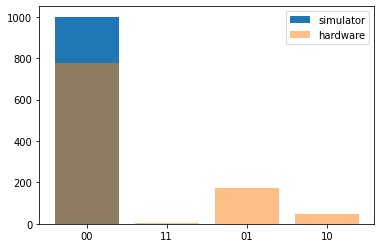

In [29]:
plt.bar(result1.measurement_counts.keys(), result1.measurement_counts.values())
plt.bar(result_hw1.measurement_counts.keys(), result_hw1.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

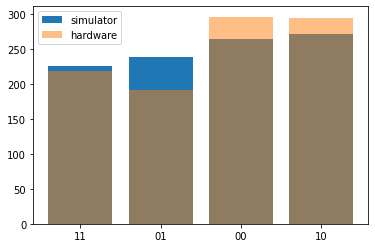

In [30]:
plt.bar(result2.measurement_counts.keys(), result2.measurement_counts.values())
plt.bar(result_hw2.measurement_counts.keys(), result_hw2.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

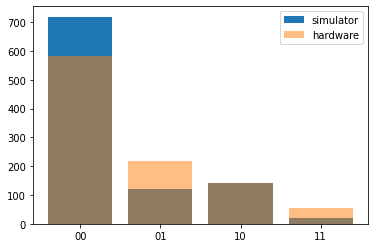

In [31]:
plt.bar(result3.measurement_counts.keys(), result3.measurement_counts.values())
plt.bar(result_hw3.measurement_counts.keys(), result_hw3.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

In [ ]:
plt.bar(result4.measurement_counts.keys(), result4.measurement_counts.values())
plt.bar(result_hw4.measurement_counts.keys(), result_hw4.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

In [ ]:
plt.bar(result5.measurement_counts.keys(), result5.measurement_counts.values())
plt.bar(result_hw5.measurement_counts.keys(), result_hw5.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])